In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import sklearn.metrics as metrics
# from scipy.stats import ttest_ind
import numpy as np
import os
os.chdir('..')
# from PairingVDJdb_GA import get_mode, check_correct_pairs_ID
from PairingVDJdb_MI import _define_individuals
import functions.myfunctions as mf
import functions.helperfunctions as hf
pd.options.mode.chained_assignment = None

In [2]:
vdj = pd.read_csv('data/vdj_cleaned_subset_for_MI.csv', index_col=0).drop('Unnamed: 0', axis=1)
vdj = vdj.replace('https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#', '10xGenomics')
vdj = vdj.replace('https://github.com/antigenomics/vdjdb-db/issues/*', 'GitHubIssue', regex=True)
vdj = vdj.loc[vdj['Epitope'] != 'KLGGALQAK'] # because too big - takes forever
epitopes = vdj['Epitope'].unique().tolist()
# epcounts = vdj['Epitope'].value_counts()
# epitopes = epcounts.loc[epcounts<1000].index.values
# vdj = vdj.loc[vdj['Epitope'].isin(epitopes)]

In [3]:
ff0 = 'data/output/pairing_MI-IPA/all_eps_noconf/'
ff1 = 'data/output/pairing_MI-IPA/big_eps_noconf_700/'
save_folder1 = 'figures'

In [4]:
import math
import time
import csv
import gzip
def load_df_fast1(mypath, N):
    # find out which iteration number you want so that you only load useful rows
    its = math.floor(N/6)+1
    print(its)
    list_of_rows= []

    s = time.time()
    # only load the rows I need
    with gzip.open(mypath, mode='rt') as f:
        csvreader = csv.DictReader(f)
        subset = [row for row in csvreader if (row['iteration'] == str(its)) & (row['paired'] == '1')]

    R = pd.DataFrame(subset)
    # print(R.head())
    print(R.shape)
    print(R['iteration'].unique())
    R = R.loc[(R['iteration'] == R['iteration'].max()) & R['paired'] == 1]
    print(R.shape)
    assert R['paired'].astype(int).sum() == N*10 # 10 repeats
    print('elapsed:', time.time()-s)
    
    return(R)

In [5]:
mode_results = pd.DataFrame()

for ff in sorted(os.listdir(ff0)):
    print(ff)
    if 'vgene-no' in ff:
         filename = ff0+ff

         ff = ff.replace('small_ind', 'smallInd')
         ff = ff.replace('prop_test', 'propTest')
         properties = {x.split('-')[0]:x.split('-')[1] for x in ff.split('_') if '.csv' not in x}
         if properties['epitope'] in epitopes:
            epdf = _define_individuals(vdj, properties['epitope'], 'no')
            epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')

            df = hf.load_df(filename, epdf.shape[0])
            a = np.array(epdf['cdr3a_IMGTgaps_padded'].str.split(', ', expand=True))
            a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
            epdf['alpha'] = [''.join(x) for x in a] # then substitute original column
            a = np.array(epdf['cdr3b_IMGTgaps_padded'].str.split(', ', expand=True))
            a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
            epdf['beta'] = [''.join(x) for x in a] # then substitute original column         

            df_final = hf.check_mode_correct_IPA(df.reset_index(),epdf)
            df_mode = df_final[['mode_freq','correct']]
            df_mode['L'] = properties['L']
            df_mode['epitope'] = properties['epitope']
            mode_results = pd.concat([mode_results,df_mode])

            # fig, ax = plt.subplots(ncols=2, figsize=(10,4))
            # sns.histplot(data=df_final, x='mode_freq', hue='correct', hue_order=[False, True], palette=['aliceblue','royalblue'],
            #       multiple='stack', binwidth=1, binrange=(-0.5,10.5), ax=ax[0])
            # sns.histplot(data=df_final, x='mode_freq', hue='correct', hue_order=[False, True], palette=['aliceblue','royalblue'],
            #       multiple='fill', binwidth=1, binrange=(-0.5,10.5), ax=ax[1])
            # fig.suptitle(properties['epitope'] + ', ' + properties['confidence'] + ', ' + properties['L'], fontsize=16)
            # handles = ax[0].get_legend().legendHandles
            # labels = ['Mode not correct', 'Mode correct']
            # fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor = [0.5,-0.05], fontsize=14)
            # ax[0].set_xlabel('Frequency of mode', fontdict={'size':14})
            # ax[0].set_ylabel('Count at frequency', fontdict={'size':14})
            # ax[1].set_xlabel('Frequency of mode', fontdict={'size':14})
            # ax[1].set_ylabel('Proportion at frequency', fontdict={'size':14})
            # ax[0].get_legend().remove()
            # ax[1].get_legend().remove()
            # plt.tight_layout()
            #    plt.savefig(save_folder + properties['epitope'] + '_' + properties['confidence'] + '_' + properties['L'] + '_mode_correctness.png',
            #                bbox_inches="tight")
            # plt.show()

2023.05.11_all_epitopes_noconf
epitope-ASNENMETM_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[34]
(2010, 11)
[34]
elapsed: 7.73447060585022
epitope-ASNENMETM_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-yes_step-6_ones-keep_test.csv.gz
epitope-ASNENMETM_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[34]
(2010, 11)
[34]
elapsed: 6.757970094680786
epitope-ASNENMETM_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-yes_step-6_ones-keep_test.csv.gz
epitope-ATDALMTGF_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[21]
(1250, 11)
[

In [6]:
for ff0 in sorted(os.listdir(ff1)):
    if '.txt' not in ff0:
      for ff in os.listdir(ff1+ff0):
         if ('.csv' in ff) & ('vgene-no' in ff)  & ('KLGGALQAK' not in ff):
               print(ff)
            #    print(df)
               filename = ff1+ff0+'/'+ff

               ff = ff.replace('small_ind', 'smallInd')
               ff = ff.replace('prop_test', 'propTest')
               properties = {x.split('-')[0]:x.split('-')[1] for x in ff.split('_') if '.csv' not in x}
               if properties['epitope'] in epitopes:
                  df1 = pd.read_csv('data/big_epitopes_subsamples_700/' + properties['epitope'] + '_ss' + ff0 + '.csv')
                  epdf = _define_individuals(df1, properties['epitope'], 'no')
                  epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
                  df = hf.load_df(filename, epdf.shape[0])
                  a = np.array(epdf['cdr3a_IMGTgaps_padded'].str.split(', ', expand=True))
                  a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
                  epdf['alpha'] = [''.join(x) for x in a] # then substitute original column
                  a = np.array(epdf['cdr3b_IMGTgaps_padded'].str.split(', ', expand=True))
                  a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
                  epdf['beta'] = [''.join(x) for x in a] # then substitute original column         

                  df_final = hf.check_mode_correct_IPA(df.reset_index(),epdf)
                  df_mode = df_final[['mode_freq','correct']]
                  df_mode['L'] = properties['L']
                  df_mode['epitope'] = properties['epitope'] + '_' + ff0
                  mode_results = pd.concat([mode_results,df_mode])

                  # fig, ax = plt.subplots(ncols=2, figsize=(10,4))
                  # sns.histplot(data=df_final, x='mode_freq', hue='correct', hue_order=[False, True], palette=['aliceblue','royalblue'],
                  #       multiple='stack', binwidth=1, binrange=(-0.5,10.5), ax=ax[0])
                  # sns.histplot(data=df_final, x='mode_freq', hue='correct', hue_order=[False, True], palette=['aliceblue','royalblue'],
                  #       multiple='fill', binwidth=1, binrange=(-0.5,10.5), ax=ax[1])
                  # fig.suptitle(properties['epitope'] + ', ' + properties['confidence'] + ', ' + properties['L'], fontsize=16)
                  # handles = ax[0].get_legend().legendHandles
                  # labels = ['Mode not correct', 'Mode correct']
                  # fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor = [0.5,-0.05], fontsize=14)
                  # ax[0].set_xlabel('Frequency of mode', fontdict={'size':14})
                  # ax[0].set_ylabel('Count at frequency', fontdict={'size':14})
                  # ax[1].set_xlabel('Frequency of mode', fontdict={'size':14})
                  # ax[1].set_ylabel('Proportion at frequency', fontdict={'size':14})
                  # ax[0].get_legend().remove()
                  # ax[1].get_legend().remove()
                  # plt.tight_layout()
                  #    plt.savefig(save_folder + properties['epitope'] + '_' + properties['confidence'] + '_' + properties['L'] + '_mode_correctness.png',
                  #                bbox_inches="tight")
                  # plt.show()

epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 1084.6042494773865
epitope-AVFDRKSDAK_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 290.5860118865967
epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 403.6632466316223
epitope-GILGFVFTL_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 486.2984218597412
epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-all_conf

In [7]:
gm = mode_results.groupby(['epitope','L','mode_freq','correct']).size().reset_index()
gm1 = gm.groupby(['epitope','L']).sum().reset_index()[['epitope','L',0]]
gm = gm.rename(columns={0:'counts'})
gm1 = gm1.rename(columns={0:'N'})

grouped_mode = pd.merge(gm, gm1)
grouped_mode['prop'] = grouped_mode['counts']/grouped_mode['N']

In [8]:
grouped_mode

,epitope,L,mode_freq,correct,counts,N,prop
0,ASNENMETM,0.6,3,False,4,201,0.019900
1,ASNENMETM,0.6,4,False,9,201,0.044776
2,ASNENMETM,0.6,4,True,1,201,0.004975
3,ASNENMETM,0.6,5,False,14,201,0.069652
4,ASNENMETM,0.6,5,True,4,201,0.019900
...,...,...,...,...,...,...,...
836,YLQPRTFLL,1.0,4,True,1,333,0.003003
837,YLQPRTFLL,1.0,5,False,1,333,0.003003
838,YLQPRTFLL,1.0,5,True,1,333,0.003003
839,YLQPRTFLL,1.0,7,True,4,333,0.012012


In [9]:
d = grouped_mode.loc[grouped_mode['L'] == '0.6'][['mode_freq','epitope','prop','counts', 'L']].groupby(['mode_freq','epitope', 'L']).sum().reset_index()
print(d.sort_values(by=['epitope','L']))

     mode_freq    epitope    L      prop  counts
60           3  ASNENMETM  0.6  0.019900       4
93           4  ASNENMETM  0.6  0.049751      10
126          5  ASNENMETM  0.6  0.089552      18
157          6  ASNENMETM  0.6  0.134328      27
186          7  ASNENMETM  0.6  0.114428      23
..         ...        ...  ...       ...     ...
185          6  YLQPRTFLL  0.6  0.054054      18
212          7  YLQPRTFLL  0.6  0.036036      12
238          8  YLQPRTFLL  0.6  0.015015       5
261          9  YLQPRTFLL  0.6  0.009009       3
288         10  YLQPRTFLL  0.6  0.018018       6

[289 rows x 5 columns]


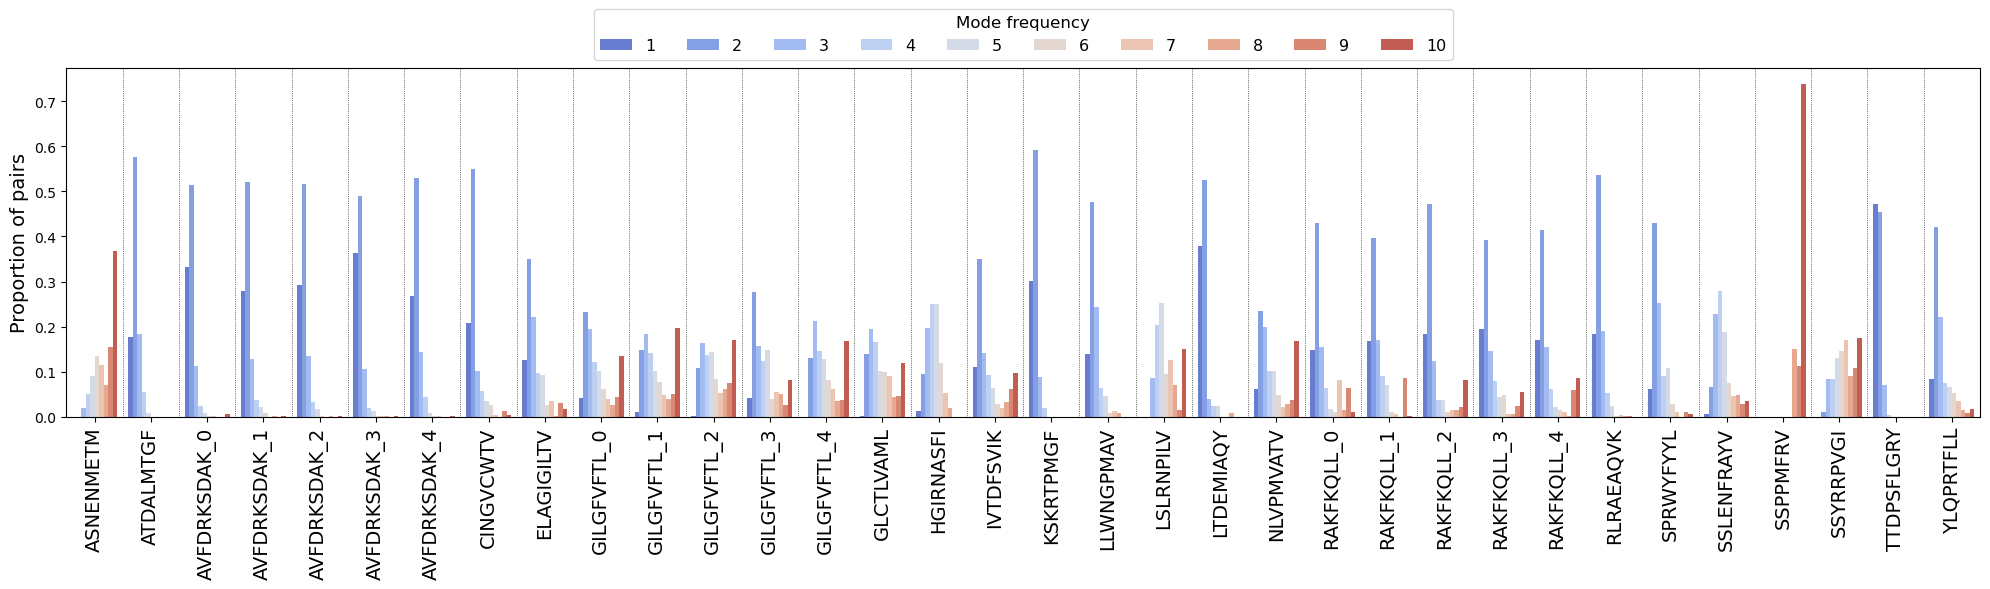

In [10]:
fig,ax=plt.subplots(figsize=(20,6))

sns.barplot(d.sort_values(by='epitope'),x='epitope',y='prop',hue='mode_freq',ax=ax, palette='coolwarm', linewidth=0)
for i in range(0, len(d['epitope'].unique())):
    ax.axvline(i+0.5, ls=':',c='k', lw=0.5)
ax.set_xlim(-0.5,len(d['epitope'].unique())-0.5)
plt.xticks(list(range(0,len(d['epitope'].unique()))), rotation=90, fontsize=14)
plt.xlabel('')
plt.ylabel('Proportion of pairs', fontdict={'size':14})
plt.legend(bbox_to_anchor=[0.5,1], loc='lower center', 
           title = 'Mode frequency', title_fontsize=12, fontsize=11.5, ncols=10)
plt.tight_layout()
plt.savefig(save_folder1 + 'all_epitopes_mode_stability.png',
                    bbox_inches='tight')
plt.show()

In [11]:
top_10 = grouped_mode.loc[grouped_mode['mode_freq'] == 10]

In [12]:
top_10

,epitope,L,mode_freq,correct,counts,N,prop
13,ASNENMETM,0.6,10,False,27,201,0.134328
14,ASNENMETM,0.6,10,True,47,201,0.233831
30,ASNENMETM,1.0,10,False,2,201,0.009950
31,ASNENMETM,1.0,10,True,6,201,0.029851
52,AVFDRKSDAK_0,0.6,10,True,4,700,0.005714
...,...,...,...,...,...,...,...
802,SSYRRPVGI,1.0,10,False,2,177,0.011299
803,SSYRRPVGI,1.0,10,True,7,177,0.039548
828,YLQPRTFLL,0.6,10,False,1,333,0.003003
829,YLQPRTFLL,0.6,10,True,5,333,0.015015


In [13]:
stable = pd.merge(top_10.loc[top_10['correct'] == True, ['L', 'epitope','prop', 'counts']].rename(columns={'prop':'correct'}),
                  top_10.loc[top_10['correct'] == False, ['L', 'epitope','prop']].rename(columns={'prop':'wrong'}),
                  how = 'outer').fillna(0)
print(stable)
for ep in d['epitope'].unique():
    if (ep not in stable['epitope'].unique()) and (ep not in grouped_mode['epitope'].unique()):
        stable.loc[stable.shape[0]] = [0.6,ep,np.nan,np.nan,np.nan]
        stable.loc[stable.shape[0]] = [1.0,ep,np.nan,np.nan,np.nan]
    elif (ep not in stable['epitope'].unique()) and (ep in grouped_mode['epitope'].unique()):
        stable.loc[stable.shape[0]] = [0.6,ep,0,0,0]
        stable.loc[stable.shape[0]] = [1.0,ep,0,0,0]
    else:
        ee = stable.loc[stable['epitope'] == ep]
        if ee.shape[0] == 1:
            # print(ee)
            if ee['L'].iloc[0] == '0.6':
                stable.loc[stable.shape[0]] = [1.0,ep,0,0,0]
            elif ee['L'].iloc[0] == '1.0':
                stable.loc[stable.shape[0]] = [0.6,ep,0,0,0]


      L       epitope   correct  counts     wrong
0   0.6     ASNENMETM  0.233831    47.0  0.134328
1   1.0     ASNENMETM  0.029851     6.0  0.009950
2   0.6  AVFDRKSDAK_0  0.005714     4.0  0.000000
3   1.0  AVFDRKSDAK_0  0.005714     4.0  0.000000
4   0.6  AVFDRKSDAK_1  0.002857     2.0  0.000000
5   1.0  AVFDRKSDAK_1  0.002857     2.0  0.000000
6   0.6  AVFDRKSDAK_2  0.001429     1.0  0.000000
7   1.0  AVFDRKSDAK_2  0.001429     1.0  0.000000
8   0.6  AVFDRKSDAK_3  0.002857     2.0  0.000000
9   1.0  AVFDRKSDAK_3  0.002857     2.0  0.000000
10  0.6  AVFDRKSDAK_4  0.002857     2.0  0.000000
11  1.0  AVFDRKSDAK_4  0.002857     2.0  0.000000
12  0.6    ELAGIGILTV  0.015789     6.0  0.002632
13  1.0    ELAGIGILTV  0.010526     4.0  0.000000
14  0.6   GILGFVFTL_0  0.052857    37.0  0.082857
15  1.0   GILGFVFTL_0  0.012857     9.0  0.000000
16  0.6   GILGFVFTL_1  0.060000    42.0  0.137143
17  1.0   GILGFVFTL_1  0.015714    11.0  0.000000
18  0.6   GILGFVFTL_2  0.060000    42.0  0.111429


In [14]:
stable['L'] = stable['L'].astype('float')
stable = stable.sort_values(by = ['epitope','L']).reset_index(drop=True)
print(stable)

      L       epitope   correct  counts     wrong
0   0.6     ASNENMETM  0.233831    47.0  0.134328
1   1.0     ASNENMETM  0.029851     6.0  0.009950
2   0.6     ATDALMTGF  0.000000     0.0  0.000000
3   1.0     ATDALMTGF  0.000000     0.0  0.000000
4   0.6  AVFDRKSDAK_0  0.005714     4.0  0.000000
..  ...           ...       ...     ...       ...
63  1.0     SSYRRPVGI  0.039548     7.0  0.011299
64  0.6    TTDPSFLGRY  0.000000     0.0  0.000000
65  1.0    TTDPSFLGRY  0.000000     0.0  0.000000
66  0.6     YLQPRTFLL  0.015015     5.0  0.003003
67  1.0     YLQPRTFLL  0.003003     1.0  0.000000

[68 rows x 5 columns]


In [15]:
from matplotlib.patches import Patch

0 47.0
1 6.0
2 0.0
3 0.0
4 4.0
5 4.0
6 2.0
7 2.0
8 1.0
9 1.0
10 2.0
11 2.0
12 2.0
13 2.0
14 0.0
15 0.0
16 6.0
17 4.0
18 37.0
19 9.0
20 42.0
21 11.0
22 42.0
23 12.0
24 27.0
25 11.0
26 37.0
27 11.0
28 21.0
29 6.0
30 0.0
31 0.0
32 39.0
33 1.0
34 0.0
35 0.0
36 0.0
37 0.0
38 11.0
39 1.0
40 0.0
41 0.0
42 55.0
43 25.0
44 8.0
45 1.0
46 1.0
47 1.0
48 44.0
49 1.0
50 35.0
51 1.0
52 57.0
53 1.0
54 0.0
55 0.0
56 1.0
57 1.0
58 3.0
59 1.0
60 56.0
61 2.0
62 20.0
63 7.0
64 0.0
65 0.0
66 5.0
67 1.0


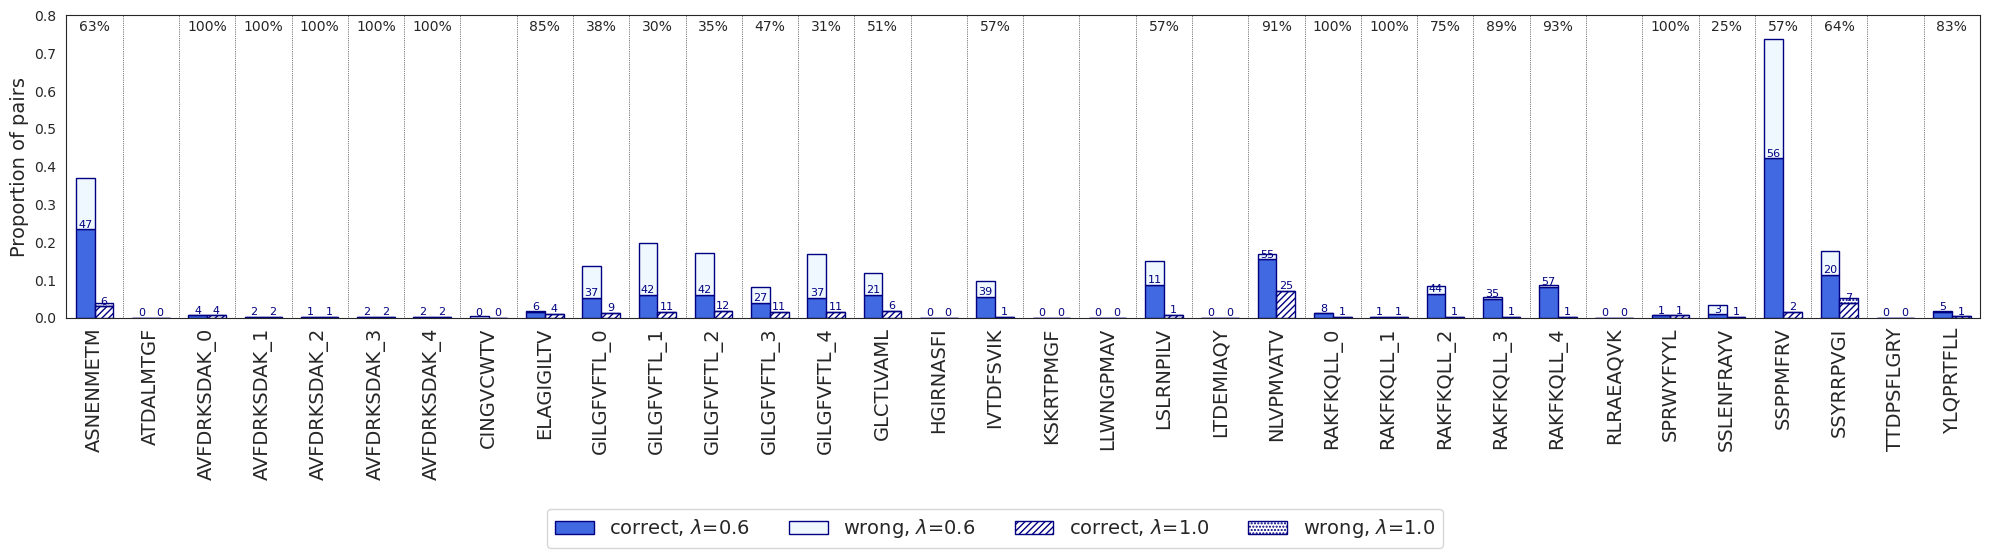

In [16]:
sns.set_style('white')

x_pos = [0,0.5, 1.5,2, 3,3.5, 4.5,5, 6,6.5, 7.5,8, 9,9.5, 10.5,11, 12,12.5, 13.5,14, 15,15.5, 16.5,17, 
         18,18.5, 19.5,20, 21,21.5, 22.5,23, 24,24.5, 25.5,26, 27,27.5, 28.5,29, 30,30.5, 31.5,32, 33,33.5, 34.5,35, 36,36.5,
         37.5,38, 39,39.5, 40.5,41, 42,42.5, 43.5,44, 45,45.5, 46.5,47, 48,48.5, 49.5,50]
# print(x_pos)
x_pos_c = np.array(x_pos)[np.array(list(range(0,len(x_pos),2)))]
x_pos_w = np.array(x_pos)[np.array(list(range(1,len(x_pos)+1,2)))]
x_pos1 = [0.25,1.75,3.25,4.75,6.25,7.75,9.25,10.75,12.25,13.75,15.25,16.75,18.25,19.75,21.25,22.75,24.25,25.75,27.25,
          28.75, 30.25, 31.75, 33.25, 34.75, 36.25, 37.75, 39.25, 40.75, 42.25, 43.75, 45.25, 46.75, 48.25, 49.75]

f,ax = plt.subplots(figsize=(20,5))
ax.bar(x = x_pos_c, height = stable.loc[stable['L'] == 0.6]['correct'], color='royalblue', width=0.5, edgecolor = 'navy')
ax.bar(x = x_pos_w, height = stable.loc[stable['L'] == 1]['correct'], fill=False, width=0.5, edgecolor = 'navy', hatch='/////')
ax.bar(x = x_pos_c, height = stable.loc[stable['L'] == 0.6]['wrong'], color='aliceblue', width=0.5, edgecolor = 'navy',
       bottom = stable.loc[stable['L'] == 0.6]['correct'])
ax.bar(x = x_pos_w, height = stable.loc[stable['L'] == 1]['wrong'], fill=False, width=0.5, edgecolor = 'navy', hatch='.....',
       bottom = stable.loc[stable['L'] == 1]['correct'])
ax.set_xticks(x_pos1, stable['epitope'].unique().tolist(), rotation=90, fontsize=14)

legend_handles = [Patch(facecolor='royalblue',edgecolor='navy',label=r'correct, $\lambda$=0.6'),
                  Patch(facecolor='aliceblue',edgecolor='navy',label=r'wrong, $\lambda$=0.6'),
                  Patch(facecolor='white',edgecolor='navy',label=r'correct, $\lambda$=1.0', hatch='/////'),
                  Patch(facecolor='white',edgecolor='navy',label=r'wrong, $\lambda$=1.0', hatch='.....')]
legend_labels = [r'correct, $\lambda$=0.6',r'wrong, $\lambda$=0.6',r'correct, $\lambda$=1.0',r'wrong, $\lambda$=1.0']

for x in [1,2.5,4,5.5,7,8.5,10,11.5,13,14.5,16,17.5,19,20.5,22,23.5,25,26.5,28,29.5,31,32.5,34,35.5,37,38.5,40,41.5,43,44.5,46,47.5,49]:
    ax.axvline(x, c='k', ls=':', lw = 0.5)
for i,c in enumerate(stable['counts'].tolist()):
    print(i,c)
    if stable.iloc[i]['L'] == 0.6:
        if c > 0:
            tpr = stable.iloc[i]['correct'] / (stable.iloc[i]['correct'] + stable.iloc[i]['wrong'])
            text = str(int(tpr*100)) + '%'
            ax.text((x_pos[i]+x_pos[i+1])/2, 0.75, text, horizontalalignment='center', verticalalignment='bottom', 
            fontsize=10)
    ax.text(x_pos[i], stable.iloc[i]['correct'], int(c), horizontalalignment='center', verticalalignment='bottom', 
            fontsize=8, color = 'navy')
ax.set_xlim(-0.5,max(x_pos)+0.5)
ax.set_ylim(0,0.8)
plt.ylabel('Proportion of pairs', fontdict={'size':14})
f.legend(legend_handles, legend_labels, ncols=4, bbox_to_anchor = [0.5,-0.01], loc='upper center', fontsize=14)
plt.tight_layout()
plt.savefig(save_folder1 + 'all_epitopes_stable_choices.png',
                    bbox_inches='tight')
plt.show()